In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler  # 标准化
from sklearn.model_selection import train_test_split  # 划分测试集与训练集
from sklearn.linear_model import LinearRegression as LR  # 回归模块

# 在ipython中直接显示图像
%matplotlib inline

# 设置绘图显示中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

In [11]:
input_file_path = '房产信息_预处理.xlsx'
data = pd.read_excel(input_file_path)

In [12]:
data.columns

Index(['描述', '位置信息', '区域', '总价', '单价', '面积', '建成时间', '关注人数', '0室0厅', '0室1厅',
       '1室0厅', '1室1厅', '1室2厅', '2室0厅', '2室1厅', '2室2厅', '3室0厅', '3室1厅', '3室2厅',
       '3室3厅', '3室4厅', '4室0厅', '4室1厅', '4室2厅', '4室3厅', '4室4厅', '5室0厅', '5室1厅',
       '5室2厅', '5室3厅', '5室4厅', '6室1厅', '6室2厅', '6室3厅', '6室4厅', '7室1厅', '7室2厅',
       '7室3厅', '7室4厅', '7室5厅', '8室2厅', '8室3厅', '9室2厅', '双流', '大邑', '天府新区',
       '天府新区南区', '崇州', '彭州', '成华', '新津', '新都', '武侯', '温江', '简阳', '蒲江', '郫都',
       '都江堰', '金堂', '金牛', '锦江', '青白江', '青羊', '高新', '高新西', '龙泉驿', '毛坯', '简装',
       '精装', '塔楼', '平房', '板塔结合', '板楼', '东', '南', '西', '北', '东北', '东南', '西南',
       '西北', '中楼层', '低楼层', '高楼层', '总楼层'],
      dtype='object')

In [13]:
# 特征提取
total_price = data.总价
unit_price = data.单价
house_area = data.面积
house_type = data[['0室1厅','1室0厅', '1室1厅', '1室2厅', '2室0厅', '2室1厅', \
                   '2室2厅', '3室0厅', '3室1厅', '3室2厅','3室3厅', '3室4厅', \
                   '4室0厅', '4室1厅', '4室2厅', '4室3厅', '4室4厅', '5室0厅',\
                   '5室1厅','5室2厅', '5室3厅', '5室4厅', '6室1厅', '6室2厅', \
                   '6室3厅', '6室4厅', '7室1厅', '7室2厅','7室3厅', '7室4厅', \
                   '7室5厅', '8室2厅', '8室3厅', '9室2厅']]
region = data[['双流', '大邑', '天府新区','天府新区南区', '崇州', '彭州', '成华', \
               '新津', '新都', '武侯', '温江', '简阳', '蒲江', '郫都','都江堰',   \
               '金堂', '金牛', '锦江', '青白江', '青羊', '高新']]
house_class = data[['塔楼', '平房', '板塔结合', '板楼']]
house_dirt = data[['东', '南', '西', '北', '东北', '东南', '西南','西北']]
house_layer = data[['中楼层', '低楼层', '高楼层']]
total_layer = data.总楼层

In [14]:
# 单变量回归
X = pd.concat([house_area, house_type, region, house_class, house_dirt, \
               house_layer, total_layer], axis=1)
Y = unit_price

In [15]:
# 设置训练集与测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2, random_state=420)

In [16]:
# 线性回归
reg = LR().fit(Xtrain, Ytrain)
# 预测
yhat = reg.predict(Xtest)
# 查看回归系数
print(list(zip(X.columns, reg.coef_)))
# 查看截距
print(reg.intercept_)

[('面积', 0.0011125764634655649), ('0室1厅', -4.1992798127665765e-13), ('1室0厅', 0.3252905022270933), ('1室1厅', 0.5132838840406304), ('1室2厅', 0.5896366635926786), ('2室0厅', 0.463404663287253), ('2室1厅', 0.5787599600180215), ('2室2厅', 0.6179733647596595), ('3室0厅', 1.642756312147269), ('3室1厅', 0.6800595725739094), ('3室2厅', 0.6878984813386352), ('3室3厅', 0.5938474213080908), ('3室4厅', 0.8662848330753945), ('4室0厅', 0.2664856337976353), ('4室1厅', 0.760497141898877), ('4室2厅', 0.814264566412363), ('4室3厅', 0.6929539050530693), ('4室4厅', 1.157218011634001), ('5室0厅', 0.5565201179764018), ('5室1厅', 1.0015706402353581), ('5室2厅', 1.021318105804965), ('5室3厅', 1.1321309267392539), ('5室4厅', 0.27309598536155844), ('6室1厅', 0.5694892074862423), ('6室2厅', 0.8378701029865341), ('6室3厅', 1.4034998101369127), ('6室4厅', 0.9077263797998738), ('7室1厅', 0.9632381619479133), ('7室2厅', 1.1762645488555852), ('7室3厅', 2.248858985675616), ('7室4厅', 0.9979491016852842), ('7室5厅', 3.199523979091623e-14), ('8室2厅', 1.1994364481586355), ('8室3厅

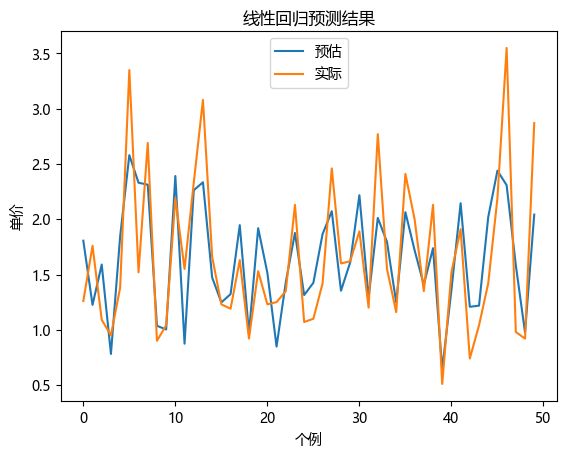

In [17]:
# 绘制前n条记录
n = 50
# 绘制模型估计值
plt.plot(range(len(yhat[:n])),yhat[:n])
# 绘制模型实际值
plt.plot(range(len(Ytest[:n])),Ytest[:n])

# 图形设置
plt.xlabel('个例')
plt.ylabel('单价')
plt.title('线性回归预测结果')
plt.legend(["预估","实际"])

In [18]:
# 用于检验模型效果
from sklearn.metrics import mean_squared_error  # MSE
from sklearn.metrics import mean_absolute_error  # MAE
from sklearn.metrics import r2_score  # R2

mse = mean_squared_error(Ytest, yhat)  # MSE
mae = mean_absolute_error(Ytest, yhat)  # MAE
r2 = r2_score(Ytest, yhat)  # R2
# 调整R2
n = Xtest.shape[0]
k = Xtest.shape[1]
adj_r2 = 1-(1-r2)*((n-1)/(n-k-1))

print('MSE : ' + str(mse))
print('MAE : ' + str(mae))
print('R2 : ' + str(r2))
print('调整R2 ：' + str(adj_r2))

MSE : 0.17934182585989458
MAE : 0.30161214689251603
R2 : 0.5455564705110019
调整R2 ：0.5405086559285879
